In [3]:
import anndata as ad
import scanpy as sc

In [4]:
adata_raw = ad.read_h5ad("../../data/sciplex3.h5ad")

In [5]:
adata_qc = ad.read_h5ad("../../data/sciplex_qc_ann.h5ad")

In [ ]:
index_raw = list(adata_raw.obs_names)
index_qc = list(adata)

In [6]:
adata_raw

AnnData object with n_obs × n_vars = 581777 × 58347
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1'

In [7]:
adata_qc

AnnData object with n_obs × n_vars = 401917 × 27544
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'SMILES', 'fmfp', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'drug_celltype_dose', 'match_index'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

In [8]:
sc.pp.normalize_total(adata_qc)
sc.pp.log1p(adata_qc)

In [9]:
sc.tl.pca(adata_qc)

In [10]:
sc.pp.neighbors(adata_qc)

In [11]:
sc.tl.umap(adata_qc)

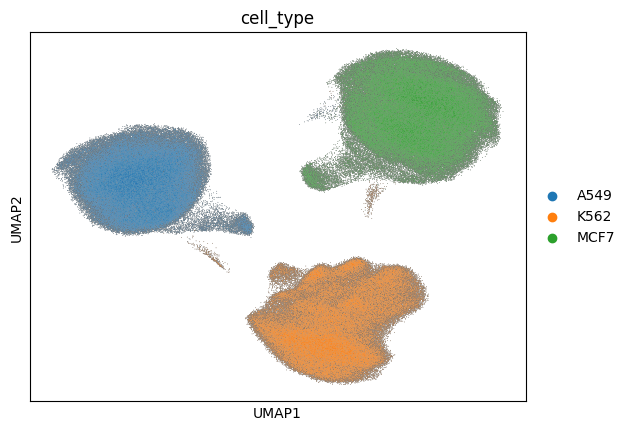

In [18]:
sc.pl.umap(
    adata_qc,
    color="cell_type",
    size=0.3,
    add_outline=True
)

In [25]:
sc.pp.highly_variable_genes(adata_qc, n_top_genes=100)

/home/victor/.local/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:700: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


In [26]:
adata_qc = adata_qc[:, adata_qc.var['highly_variable']]

In [27]:
adata_qc

View of AnnData object with n_obs × n_vars = 401917 × 100
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'SMILES', 'fmfp', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'drug_celltype_dose', 'match_index'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns:

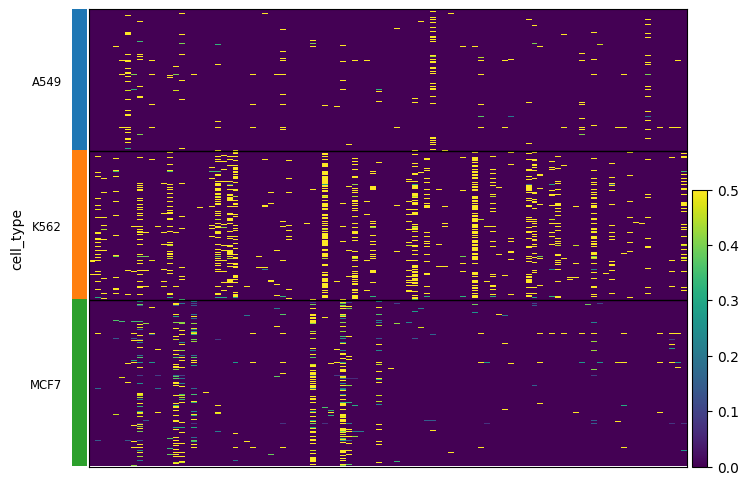

In [30]:
sc.pl.heatmap(adata_qc, list(adata_qc.var_names),  groupby='cell_type', swap_axes=False, vmin = 0, vmax=0.5)